<span style="font-size: 24px;">Visualize the loss curves</span>

In [19]:
import numpy as np
import matplotlib.pyplot as plt

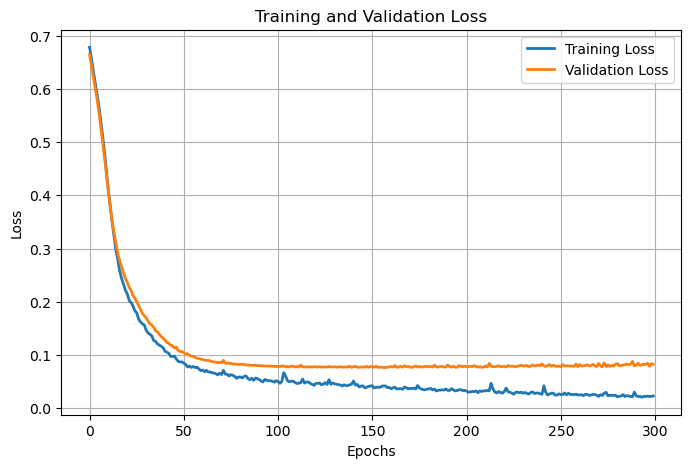

In [20]:
history = np.load("../src/history/cnn_training_history.npy", allow_pickle=True).item()


# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history["loss"], label="Training Loss", linewidth=2)
plt.plot(history["val_loss"], label="Validation Loss", linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
Train = np.load("../preprocessed_data/test_data.npz")
X_test = Train['X_test']
y_test = Train['y_test']

print(X_test.shape)
print(y_test)

(165, 32, 32, 1)
[1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0
 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1
 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0
 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1
 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1]


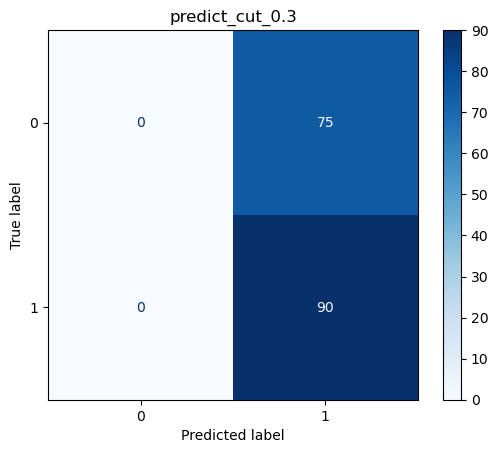

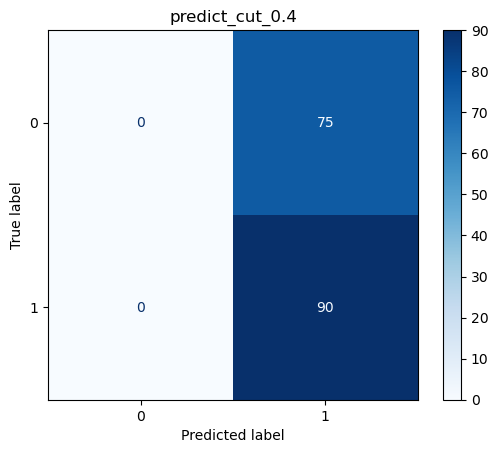

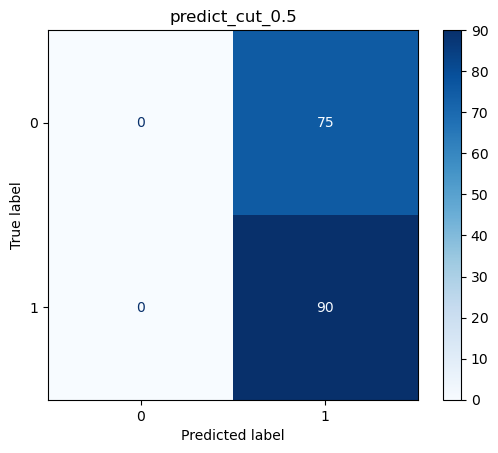

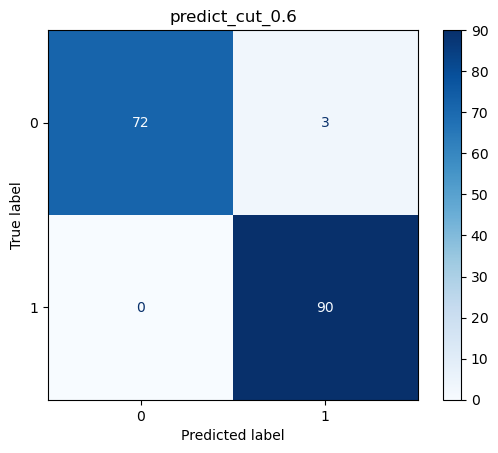

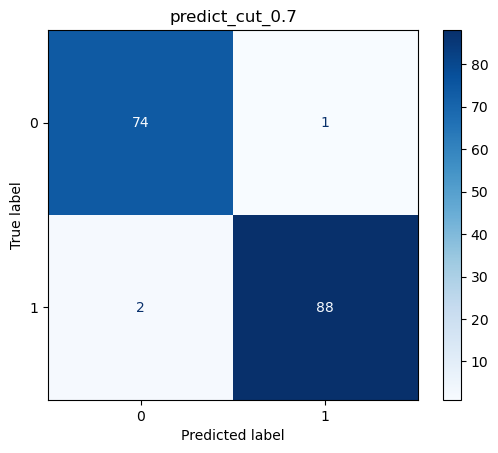

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cuts = [0.3, 0.4, 0.5, 0.6, 0.7]

for i in range(len(cuts)):
    predict = np.load(f"../predictions/predict_cut_{cuts[i]}.npz")
    y_pred = predict['pred']
    
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"predict_cut_{cuts[i]}")
    plt.show()